# Ch09. 주식데이터를 통해 groupby 사용하기

## 1. 데이터 이동하기 (shift)

### 학습 목표
- 데이터를 이동한다. (`shift` 함수)
- 데이터를 이동해 연산한다. (`diff`, `pct_change` 함수)

> pandas shift

<img src=https://i.ibb.co/vcxZn1B/09-01.png, width=600>

데이터를 정해진 칸만큼 이동시키는 함수


**periods** (정수)

이동할 칸을 지정하는 인자

**freq**

날짜나 시간 데이터를 shift 할 때 사용하는 인자
 
**axis** (0 or 1)

이동 방향을 지정하는 인자

<br><br>

[shift 공식문서](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html)

In [1]:
# 실습 준비 코드
import pandas as pd
data = [['01/01', 1000], ['01/02', 1200], ['01/03', 900], 
        ['01/04', 1200], ['01/05', 1500]]
df = pd.DataFrame(data, columns=['날짜', '가격'])
df

,날짜,가격
0,01/01,1000
1,01/02,1200
2,01/03,900
3,01/04,1200
4,01/05,1500


In [2]:
# 데이터 프레임에 shift 함수 적용하기
df.shift()

,날짜,가격
0,None,NaN
1,01/01,1000.0
2,01/02,1200.0
3,01/03,900.0
4,01/04,1200.0


In [3]:
# shift 함수에 음수 입력하기
df.shift(-1)

,날짜,가격
0,01/02,1200.0
1,01/03,900.0
2,01/04,1200.0
3,01/05,1500.0
4,None,NaN


In [24]:
# 가로방향으로 shift하기
df.shift(axis=1)

,Open,High,Low,Close,Volume,Change,Code
Date,,,,,,,
2018-01-02,NaN,28100,29504,28000,29405,1345951,0.069350
2018-01-03,NaN,30205,30306,29203,29906,1154361,0.017038
2018-01-04,NaN,30608,31911,30006,31311,2265019,0.046981
...,...,...,...,...,...,...,...
2020-12-28,NaN,75168,75670,74164,74867,646464,-0.002678
2020-12-29,NaN,76472,77375,75869,77175,857404,0.030828
2020-12-30,NaN,77175,79082,76974,78179,813142,0.013009


In [5]:
# 시리즈를 shift해서 가격변동 열 만들기
df1 = df.copy()
df1['가격변동'] = df1['가격'] - df1['가격'].shift()
df1

,날짜,가격,가격변동
0,01/01,1000,NaN
1,01/02,1200,200.0
2,01/03,900,-300.0
3,01/04,1200,300.0
4,01/05,1500,300.0


In [6]:
# diff 함수로 가격변동 열 만들기
df1['가격변동'] = df1['가격'].diff()
df1

,날짜,가격,가격변동
0,01/01,1000,NaN
1,01/02,1200,200.0
2,01/03,900,-300.0
3,01/04,1200,300.0
4,01/05,1500,300.0


In [7]:
# 시리즈를 shift해서 변동률 열 만들기
df1 = df.copy()
df1['변동률'] = (df1['가격'] - df1['가격'].shift()) / df1['가격'].shift()
df1

,날짜,가격,변동률
0,01/01,1000,NaN
1,01/02,1200,0.200000
2,01/03,900,-0.250000
3,01/04,1200,0.333333
4,01/05,1500,0.250000


In [ ]:
# pct_change 함수로 열 만들기
df1['변동률'] = df1['가격'].pct_change()  # 이걸 몰라도 shift를 이용해서 구현 가능.
df1

,날짜,가격,변동률
0,01/01,1000,NaN
1,01/02,1200,0.200000
2,01/03,900,-0.250000
3,01/04,1200,0.333333
4,01/05,1500,0.250000


## 2. groupby가 필요한 이유

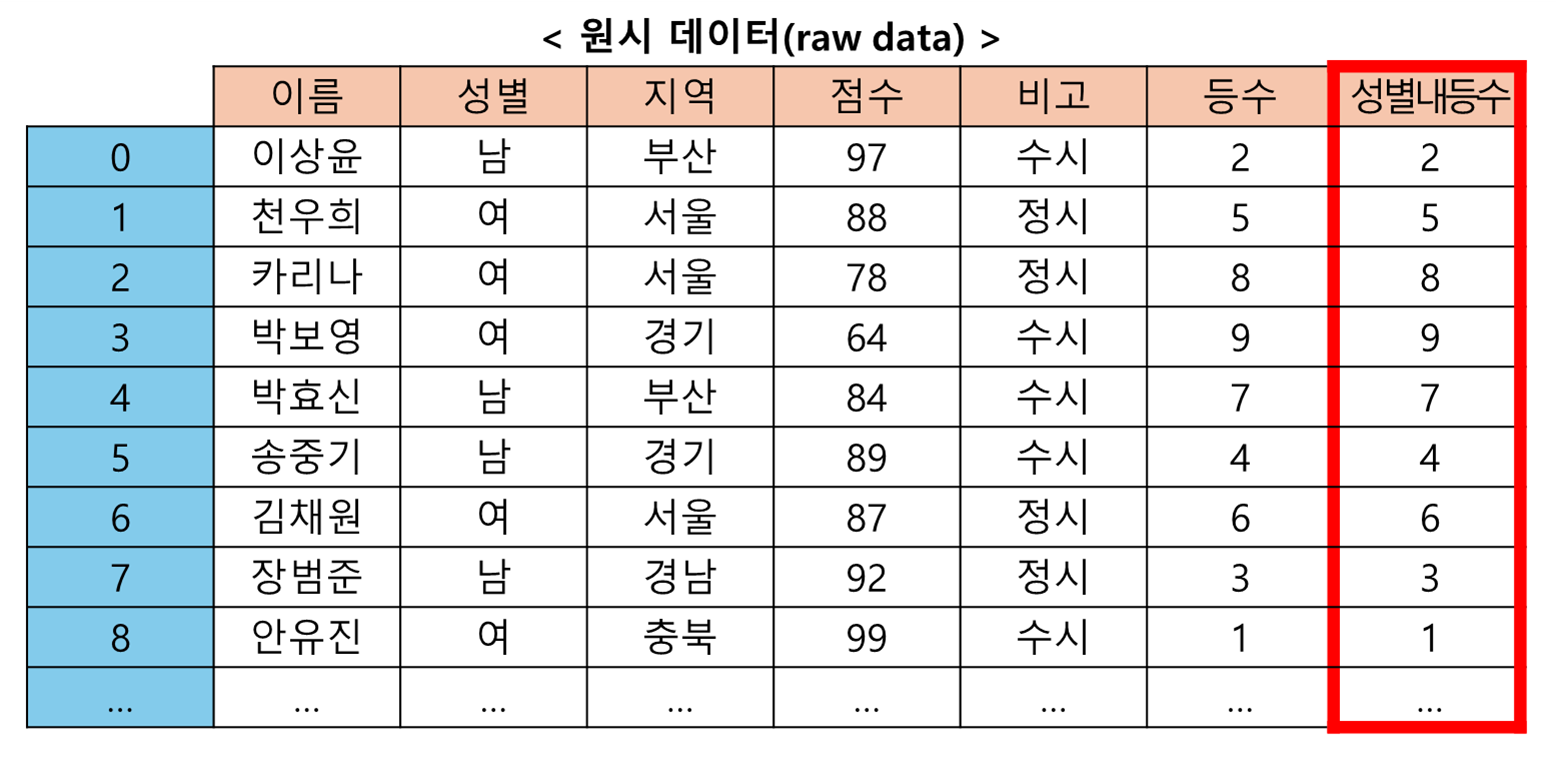

raw data에서 다른 열의 특성으로 그룹화해서 함수를 적용할 때 필요하다

→ raw data를 다룰 때는 매우 빈번한 일이다

예를 들어, 위 그림에서 성별 내 등수, 지역 내 등수 등을 구해야 하는 경우를 말한다

이런 경우, groupby로 성별 열로 그룹화한 후 rank 함수를 적용하면 성별 내 등수를 구할 수 있다 




## 3. groupby 함수 배우기

### 학습 목표
- 그룹화해서 함수를 적용한다. (`groupby` 함수)
- `groupby` 함수의 구조를 숙지한다.
- `groupby` 함수를 적용했을 때 차원축소함수와 일반 함수의 차이를 알게 된다.

> pandas groupby


<img src=https://i.ibb.co/5rk4LCy/09-03.png, width=600>

그룹 내에서 함수를 적용하게 해주는 함수


**by** 

그룹을 나누는 기준. 복수라면 리스트로 입력

 

**axis** (0 or 1)

그룹해서 함수를 행에 적용할 것인지 열에 적용할 것인지 지정하는 인자. 기본값은 열

 

**level**

인덱스로 그룹을 나눌 때 사용하는 인자

 

**as_index** (bool / 기본값은 True)

groupby로 집계 함수를 사용할 때 그룹이 인덱스가 될지 지정하는 인자

 

**sort** (bool / 기본값은 True)

그룹의 key로 정렬을 할 것인지 지정하는 인자

<br><br>

[groupby 판다스 공식문서](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

In [9]:
# 수업 준비 코드
import pandas as pd
data1 = [['이상윤', 'A', '남', 95], ['송중기', 'B', '남', 93],
         ['카리나', 'B', '여', 88], ['박효신', 'A', '남', 85],
         ['박보영', 'B', '여', 78], ['안유진', 'A', '여', 72]]

data2 = [['2021-01-01', '이상윤', 10000], ['2021-01-01', '박보영', 2000],
         ['2021-01-02', '이상윤', 20000], ['2021-01-02', '박보영', 5000],
         ['2021-01-03', '박보영', 8000], ['2021-01-03', '이상윤', 5000]]

df1 = pd.DataFrame(data1, columns=['이름', '반', '성별', '점수'])
df2 = pd.DataFrame(data2, columns=['날짜', '이름', '입금'])
df1

,이름,반,성별,점수
0,이상윤,A,남,95
1,송중기,B,남,93
2,카리나,B,여,88
3,박효신,A,남,85
4,박보영,B,여,78
5,안유진,A,여,72


#### 일반적인 사용법 : `df.groupby(그룹의 기준)[함수를 적용할 열].적용할 함수호출`

In [10]:
# 반으로 그룹화 해서 rank 함수 적용하기
df = df1.copy()
df['학급내등수'] = df.groupby('반')['점수'].rank(ascending=False)
df

,이름,반,성별,점수,학급내등수
0,이상윤,A,남,95,1.0
1,송중기,B,남,93,1.0
2,카리나,B,여,88,2.0
3,박효신,A,남,85,2.0
4,박보영,B,여,78,3.0
5,안유진,A,여,72,3.0


In [11]:
# 반과 성별로 그룹화 해서 rank 함수 적용하기
df = df1.copy()
df['등수2'] = df.groupby(['반', '성별'])['점수'].rank(ascending=False)
df

,이름,반,성별,점수,등수2
0,이상윤,A,남,95,1.0
1,송중기,B,남,93,1.0
2,카리나,B,여,88,1.0
3,박효신,A,남,85,2.0
4,박보영,B,여,78,2.0
5,안유진,A,여,72,1.0


In [12]:
# 적용할 함수로 집계함수 적용하기
df.groupby(['반', '성별'])['점수'].mean()

반  성별
A  남     90.0
   여     72.0
B  남     93.0
   여     83.0
Name: 점수, dtype: float64

In [13]:
# 피벗테이블과 같은 교차표 만들기
df.groupby(['반', '성별'])['점수'].mean().unstack()

성별,남,여
반,,
A,90.0,72.0
B,93.0,83.0


<img src=https://i.ibb.co/hRFtSTb/groupby.jpg, width=600>

In [14]:
df2

,날짜,이름,입금
0,2021-01-01,이상윤,10000
1,2021-01-01,박보영,2000
2,2021-01-02,이상윤,20000
3,2021-01-02,박보영,5000
4,2021-01-03,박보영,8000
5,2021-01-03,이상윤,5000


In [15]:
# groupby로 shift 함수 적용하기
df2['전일입금'] = df2.groupby('이름')['입금'].shift()
df2

,날짜,이름,입금,전일입금
0,2021-01-01,이상윤,10000,NaN
1,2021-01-01,박보영,2000,NaN
2,2021-01-02,이상윤,20000,10000.0
3,2021-01-02,박보영,5000,2000.0
4,2021-01-03,박보영,8000,5000.0
5,2021-01-03,이상윤,5000,20000.0


## 4. 파이썬 라이브러리를 통해 주식데이터 가져오기 (Finance Data Reader)

**Finance Data Reader**

한국 주식 가격, 미국주식 가격, 지수, 환율, 암호화폐 가격, 종목 리스팅 등 금융 데이터 수집 라이브러리


<br><br>

**설치**



```python
import sys
!{sys.executable} -m pip install -U finance-datareader
```

<br>

**사용**
```python
import FinanceDataReader as fdr
```

<br>

**국내주식 데이터 가져오기**

`fdr.DataReader` 함수로 국내 주식 데이터를 가져올 수 있다

삼성전자 주가 데이터를 2018-01-01부터 2020-12-31까지 가져온다

```python
fdr.DataReader('005930', '2018-01-01', '2020-12-31')
```

2018년부터 2020년까지의 모든 데이터이므로 아래와 같은 코드도 가능하다


```python
fdr.DataReader('005930', '2018', '2021')
```

<br>

**차트 설정**

```python
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True
```


<br>

**기간내 종가 변동 차트 그리기**

데이터 프레임이니까 `pandas`의 `plot` 함수로 그려보자

```python
fdr.DataReader('005930', '2018', '2021')['Close'].plot()
```

<br>

**캔들 차트 그리기**

`fdr.chart.plot` 함수로 캔들 차트를 그릴 수 있다

삼성전자의 2020년 1월 주가를 캔들차트로 그려보자

```python
df1 = fdr.DataReader('005930', '2020-01', '2020-02')
fdr.chart.candle(df1)
```

캔들 차트의 인자는 링크를 참조 : 
https://nbviewer.org/gist/FinanceData/c6c336c4727386810bec9264e81f6bba


<br><br>

그외 많은 기능들이 있으니 다음링크를 참조

<img src=https://i.imgur.com/r0YE5Xs.png, width=400>

https://financedata.github.io/posts/finance-data-reader-users-guide.html


In [16]:
# finance data reader 설치
import sys
!{sys.executable} -m pip install -U finance-datareader bs4 plotly bokeh

   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
    --------------------------------------- 0.3/14.8 MB ? eta -:--:--
   ---- ----------------------------------- 1.6/14.8 MB 6.7 MB/s eta 0:00:02
   ------- -------------------------------- 2.6/14.8 MB 5.4 MB/s eta 0:00:03
   ------------ --------------------------- 4.7/14.8 MB 6.8 MB/s eta 0:00:02
   ------------------- -------------------- 7.1/14.8 MB 7.8 MB/s eta 0:00:01
   ------------------------ --------------- 9.2/14.8 MB 8.3 MB/s eta 0:00:01
   ----------------------------- ---------- 11.0/14.8 MB 8.4 MB/s eta 0:00:01
   ------------------------------- -------- 11.8/14.8 MB 7.7 MB/s eta 0:00:01
   ------------------------------------ --- 13.6/14.8 MB 8.0 MB/s eta 0:00:01
   -------------------------------------- - 14.4/14.8 MB 7.3 MB/s eta 0:00:01
   ---------------------------------------- 14.8/14.8 MB 7.3 MB/s eta 0:00:00
   ------------

In [17]:
# 삼성전자의 주가 데이터를 2018년부터 2020년까지 모두 가져오기
import FinanceDataReader as fdr
import pandas as pd
pd.options.display.max_rows = 6
fdr.DataReader('005930', '2018-01-01', '2020-12-31')

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177
2018-01-03,52540,52560,51420,51620,200270,0.011760
2018-01-04,52120,52180,50640,51080,233909,-0.010461
...,...,...,...,...,...,...
2020-12-28,79000,80100,78200,78700,40085044,0.011568
2020-12-29,78800,78900,77300,78300,30339449,-0.005083
2020-12-30,77400,81300,77300,81000,29417421,0.034483


In [18]:
# 연도로 가져올 수도 있다
fdr.DataReader('005930', '2018', '2021')

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177
2018-01-03,52540,52560,51420,51620,200270,0.011760
2018-01-04,52120,52180,50640,51080,233909,-0.010461
...,...,...,...,...,...,...
2020-12-28,79000,80100,78200,78700,40085044,0.011568
2020-12-29,78800,78900,77300,78300,30339449,-0.005083
2020-12-30,77400,81300,77300,81000,29417421,0.034483


In [19]:
# 차트 설정
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

<Axes: xlabel='Date'>

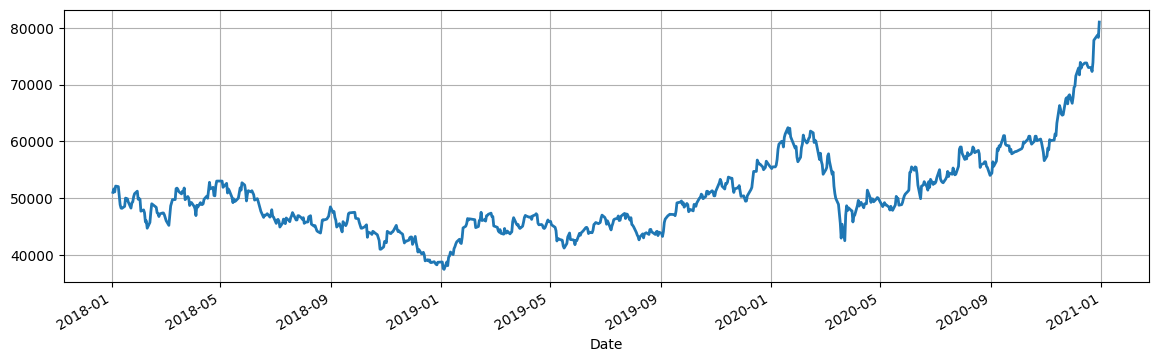

In [20]:
# 종가 그래프 그리기
df = fdr.DataReader('005930', '2018-01-01', '2020-12-31')
df.head()
df['Close'].plot()

In [21]:
# 캔들차트 그리기
df1 = fdr.DataReader('005930', '2020-01', '2020-02')
fdr.chart.candle(df1)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'close': {'bdata': ('oNcAAMzYAADM2AAA+NkAAODdAADo5A' ... 'AAgO0AALDlAADc5gAAcN8AAFDcAAA='),
                        'dtype': 'i4'},
              'decreasing': {'fillcolor': 'blue', 'line': {'color': 'blue', 'width': 1.5}},
              'high': {'bdata': ('wNoAABjdAAAw2QAAUNwAADjgAADo5A' ... 'AAaPEAAAjoAAA06QAAsOUAACDkAAA='),
                       'dtype': 'i4'},
              'increasing': {'fillcolor': 'red', 'line': {'color': 'red', 'width': 1.5}},
              'low': {'bdata': ('2NYAAHTWAABI1QAAMNkAAFzaAAA44A' ... 'AAHO0AALzjAACw5QAA4N0AAFDcAAA='),
                      'dtype': 'i4'},
              'name': '',
              'opacity': 0.75,
              'open': {'bdata': ('zNgAAMDaAAB01gAAlNkAAIjbAAAg5A' ... 'AAaPEAAAjoAADc5gAAsOUAAMjhAAA='),
                       'dtype': 'i4'},
              'showlegend': False,
              'text': [DoD: nan% OC: -0.5%, OH: 0.9%, DoD: 0.5% OC: -0.9%, OH:
                       1.1%, DoD: 0.0% OC: 1.1%, OH: 1.3%, DoD: 0.5% OC: 0.2%, OH:
                       1.3%, DoD: 1.8% OC: 1.1%, OH: 2.1%, DoD: 3.2% OC: 0.3%, OH:
                       0.3%, DoD: 1.5% OC: 1.2%, OH: 1.5%, DoD: 0.8% OC: 0.7%, OH:
                       0.7%, DoD: 0.0% OC: -0.7%, OH: 1.0%, DoD: -1.7% OC: -0.8%,
                       OH: 0.2%, DoD: 2.9% OC: 2.7%, OH: 2.7%, DoD: 1.0% OC: -1.0%,
                       OH: 0.2%, DoD: 1.8% OC: 0.6%, OH: 1.3%, DoD: -1.6% OC:
                       -1.0%, OH: 0.6%, DoD: 1.5% OC: 3.0%, OH: 3.5%, DoD: -2.4%
                       OC: -1.6%, OH: 0.0%, DoD: -3.3% OC: -1.0%, OH: 0.0%, DoD:
                       0.5% OC: 0.0%, OH: 1.0%, DoD: -3.2% OC: -2.7%, OH: 0.0%,
                       DoD: -1.4% OC: -2.4%, OH: 1.0%],
              'type': 'candlestick',
              'x': array(['2020-01-02T00:00:00.000000000', '2020-01-03T00:00:00.000000000',
                          '2020-01-06T00:00:00.000000000', '2020-01-07T00:00:00.000000000',
                          '2020-01-08T00:00:00.000000000', '2020-01-09T00:00:00.000000000',
                          '2020-01-10T00:00:00.000000000', '2020-01-13T00:00:00.000000000',
                          '2020-01-14T00:00:00.000000000', '2020-01-15T00:00:00.000000000',
                          '2020-01-16T00:00:00.000000000', '2020-01-17T00:00:00.000000000',
                          '2020-01-20T00:00:00.000000000', '2020-01-21T00:00:00.000000000',
                          '2020-01-22T00:00:00.000000000', '2020-01-23T00:00:00.000000000',
                          '2020-01-28T00:00:00.000000000', '2020-01-29T00:00:00.000000000',
                          '2020-01-30T00:00:00.000000000', '2020-01-31T00:00:00.000000000'],
                         dtype='datetime64[ns]'),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'marker': {'color': array(['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue',
                                         'red', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'red', 'blue',
                                         'blue'], dtype=object)},
              'name': '',
              'opacity': 0.5,
              'showlegend': False,
              'type': 'bar',
              'x': array(['2020-01-02T00:00:00.000000000', '2020-01-03T00:00:00.000000000',
                          '2020-01-06T00:00:00.000000000', '2020-01-07T00:00:00.000000000',
                          '2020-01-08T00:00:00.000000000', '2020-01-09T00:00:00.000000000',
                          '2020-01-10T00:00:00.000000000', '2020-01-13T00:00:00.000000000',
                          '2020-01-14T00:00:00.000000000', '2020-01-15T00:00:00.000000000',
                          '2020-01-16T00:00:00.000000000', '2020-01-17T00:00:00.000000000',
                          '2020-01-20T00:00:00.000000000', '2020-01-21T00:00:00.000000000',
                          '2020-01-22T00:00:00.000000000', '2020-01-23T00:00:00.000000000',
                          '2020-01-28T00:00:00.000000000', '2020

In [22]:
# 삼성전자와 카카오 두개 종목의 주가데이터 합쳐서 불러오기
stocks = ['005930', '035720']
df_ex1 = pd.DataFrame()
for i in stocks:
  df = fdr.DataReader(i, '2018', '2021')
  df['Code'] = i
  df_ex1 = pd.concat([df_ex1, df])
df_ex1

,Open,High,Low,Close,Volume,Change,Code
Date,,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177,005930
2018-01-03,52540,52560,51420,51620,200270,0.011760,005930
2018-01-04,52120,52180,50640,51080,233909,-0.010461,005930
...,...,...,...,...,...,...,...
2020-12-28,75168,75670,74164,74867,646464,-0.002678,035720
2020-12-29,76472,77375,75869,77175,857404,0.030828,035720
2020-12-30,77175,79082,76974,78179,813142,0.013009,035720


**주식 종목 코드와 종목명 얻기**

- `FinanceDataReader`를 통해서 주가 데이터를 가져오려면 종목 코드가 필요하다

- `FinanceDataReader`도 기본적인 종목명과 코드를 제공하지만 보다 세부적인 지표와 함께 종목코드와 종목명을 얻기 위해 KRX 사이트를 이용하자

  <img src=https://i.ibb.co/ZNLKc86/09-04.png, width=600>

  http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201


- 단순히 종목코드와 종목명 뿐만 아니라 시가총액, 등락률 등으로 원하는 종목을 필터링해서 파일로 가져올 수 있다

- 파일에서 데이터 프레임을 불러낼 수 있으니 종목의 데이터를 활용할 수 있다


- 단순 실습을 원하는 경우 23-02-27 기준의 전종목 데이터를 미리 다운받아둔 `./09_01_stock_230227.csv` 파일을 이용하자

- 실제 주가 데이터를 업무에 활용하는 경우는 직접 다운받아서 활용하자

In [25]:
# KRX 사이트에서 현시점 기준 시가총액 상위 90개의 종목 리스트 가져오기
url1 = './09_01_stock_230227.csv'
df_stocks = pd.read_csv(url1).iloc[:, [0, 1, 2, 4, 5, 6, 7, 8, 9, 12]]
df_90 = df_stocks.sort_values('시가총액', ascending=False).iloc[:90, [0, 1]]
df_90

,종목코드,종목명
999,005930,삼성전자
155,373220,LG에너지솔루션
247,000660,SK하이닉스
...,...,...
645,241560,두산밥캣
2342,028670,팬오션
1006,029780,삼성카드


In [26]:
# 현시점 기준 시가총액 상위 90개의 2018~2020년 주가 가져오기
stocks = df_90['종목코드'].tolist()
df_ex1 = pd.DataFrame()
for i in stocks:
  df = fdr.DataReader(i, '2018', '2021')
  df['Code'] = i
  df_ex1 = pd.concat([df_ex1, df])
df_ex1

,Open,High,Low,Close,Volume,Change,Code
Date,,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177,005930
2018-01-03,52540,52560,51420,51620,200270,0.011760,005930
2018-01-04,52120,52180,50640,51080,233909,-0.010461,005930
...,...,...,...,...,...,...,...
2020-12-28,35700,35700,34700,35050,348624,-0.005674,029780
2020-12-29,33500,33600,32750,33100,325446,-0.055635,029780
2020-12-30,33050,33050,32000,32500,256237,-0.018127,029780


현 시점 기준으로는 시총 상위 90개에 해당하지만 2020년에 상장하지 않은 종목들이 있어 90개 종목의 데이터는 아니다

In [27]:
# 날짜를 열로 만들고 종목명도 붙혀주기
df_ex2 = df_ex1.reset_index().merge(df_90.set_axis(['Code', 'Stock'], axis=1), how='left')
df_ex2

,Date,Open,High,Low,Close,Volume,Change,Code,Stock
0,2018-01-02,51380,51400,50780,51020,169485,0.001177,005930,삼성전자
1,2018-01-03,52540,52560,51420,51620,200270,0.011760,005930,삼성전자
2,2018-01-04,52120,52180,50640,51080,233909,-0.010461,005930,삼성전자
...,...,...,...,...,...,...,...,...,...
57259,2020-12-28,35700,35700,34700,35050,348624,-0.005674,029780,삼성카드
57260,2020-12-29,33500,33600,32750,33100,325446,-0.055635,029780,삼성카드
57261,2020-12-30,33050,33050,32000,32500,256237,-0.018127,029780,삼성카드


In [28]:
# 파일로 저장하기
df_ex2.to_csv('result_stocks.csv', index=False)

## 5. 2일 연속 급상승 주식 필터링하기

**데이터와 경로명** : 

현 시점 시총 상위 90개 종목의 2018~2020년의 주가 데이터 

(2020년까지 상장하지 않았던 종목 제외하면 81개)

<br>

**위 종목들 중에 2일 연속 20%이상 상승한 데이터만 필터링 해보자**

In [29]:
# 프로젝트 코드
import pandas as pd
pd.options.display.max_rows = 6
url = './09_02_stocks.csv'
df_ex2 = pd.read_csv(url, dtype={'Code':'str'})
df_ex2

,Date,Open,High,Low,Close,Volume,Change,Code,Stock
0,2018-01-02,51380,51400,50780,51020,169485,0.001177,005930,삼성전자
1,2018-01-03,52540,52560,51420,51620,200270,0.011760,005930,삼성전자
2,2018-01-04,52120,52180,50640,51080,233909,-0.010461,005930,삼성전자
...,...,...,...,...,...,...,...,...,...
57259,2020-12-28,35700,35700,34700,35050,348624,-0.005674,029780,삼성카드
57260,2020-12-29,33500,33600,32750,33100,325446,-0.055635,029780,삼성카드
57261,2020-12-30,33050,33050,32000,32500,256237,-0.018127,029780,삼성카드


In [30]:
# 2거래일 연속 20%이상 상승한 데이터 필터링
cond1 = df_ex2['Change'] >= 0.2
cond2 = df_ex2.groupby('Stock')['Change'].shift() >= 0.2
df_ex2[cond1 & cond2]

,Date,Open,High,Low,Close,Volume,Change,Code,Stock
22484,2020-07-22,6986,8236,6986,7608,92389322,0.200189,034020,두산에너빌리티
22511,2020-08-31,11969,14672,11747,14275,82099317,0.238504,034020,두산에너빌리티
39353,2020-07-06,214500,214500,193500,214500,7126211,0.300000,326030,SK바이오팜
54666,2019-10-07,38810,45906,37224,45448,14077449,0.266278,028300,HLB


결과가 맞는지 두산에너빌리티로 확인해보자

<img src=https://i.ibb.co/5RX6WpG/09-05-01.png, width=600>

## 6. 시리즈와 데이터프레임의 연산 (broad casting)

### 학습 목표
- 시리즈와 데이터 프레임의 연산 방식을 알게 된다. (`apply` 함수)

**시리즈와 데이터 프레임의 연산은 브로드 캐스팅(broad casting)을 한다**

<img src=https://i.ibb.co/1GrVPzq/09-06-01.png, width=600>

<img src=https://i.ibb.co/d5BwbVt/09-06-02.png, width=600>

먼저 시리즈의 눕혀진 다음 그 후 행방향으로 확장해서 데이터 프레임을 만들어 연산을 하는 것과 같다 (axis=1이며 기본값)

In [35]:
# 실습 준비 코드
import pandas as pd
data = [[83, 66, 72], [87, 94, 98], [62, 71, 69], [94, 92, 72]]
df = pd.DataFrame(data, index=list('ABCD'), columns=['국어', '영어', '수학'])
df

,국어,영어,수학
A,83,66,72
B,87,94,98
C,62,71,69
D,94,92,72


In [36]:
s1 = pd.Series([1, 2, 3], index=['국어', '영어', '수학'])
s1

국어    1
영어    2
수학    3
dtype: int64

In [37]:
# 시리즈와 데이터 프레임의 연산 : 브로드 캐스팅
df + s1

,국어,영어,수학
A,84,68,75
B,88,96,101
C,63,73,72
D,95,94,75


In [38]:
s2 = pd.Series([10, 0, 0, 10], index=list('ABCD'))
s2

A    10
B     0
C     0
D    10
dtype: int64

In [39]:
# 아래 연산은 연산 함수를 사용해 브로드 캐스팅의 축을 바꿔야 한다
df + s2

,A,B,C,D,국어,수학,영어
A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**broad casting의 방향 바꾸기**

<img src=https://i.ibb.co/4WV6S0z/09-06-03.png, width=600>

<img src=https://i.ibb.co/ZLYWJYf/09-06-04.png, width=600>

열 방향으로 확장시킨 것과 같은 결과를 얻으려면 axis=0으로 브로드 캐스팅을 해야한다

이것은 연산자로는 할 수 없고 연산 함수를 써야 한다

**연산자와 연산함수**

- 덧셈(+) : `add`
- 뺄셈(-) : `sub`
- 곱셈(*) : `mul`
- 나눗셈(/) : `div` 

In [40]:
# df.add(s2) 이거는 df + s2 랑 같음.

In [41]:
# 브로드 캐스팅은 axis=1이 기본값이다
df.add(s2, axis=0)

,국어,영어,수학
A,93,76,82
B,87,94,98
C,62,71,69
D,104,102,82


In [44]:
df

,국어,영어,수학
A,83,66,72
B,87,94,98
C,62,71,69
D,94,92,72


In [45]:
df.mean()

국어    81.50
영어    80.75
수학    77.75
dtype: float64

In [43]:
# 비교연산도 브로드 캐스팅 할 수 있다
df > df.mean()

,국어,영어,수학
A,True,False,False
B,True,True,True
C,False,False,False
D,True,True,False


## 7. 신규 상장 주식의 주가 변동 추이 알아보기

In [46]:
# 프로젝트 코드
import pandas as pd
pd.options.display.max_rows = 6
url = './09_02_stocks.csv'
df_ex2 = pd.read_csv(url, dtype={'Code':'str'})
df_ex2

,Date,Open,High,Low,Close,Volume,Change,Code,Stock
0,2018-01-02,51380,51400,50780,51020,169485,0.001177,005930,삼성전자
1,2018-01-03,52540,52560,51420,51620,200270,0.011760,005930,삼성전자
2,2018-01-04,52120,52180,50640,51080,233909,-0.010461,005930,삼성전자
...,...,...,...,...,...,...,...,...,...
57259,2020-12-28,35700,35700,34700,35050,348624,-0.005674,029780,삼성카드
57260,2020-12-29,33500,33600,32750,33100,325446,-0.055635,029780,삼성카드
57261,2020-12-30,33050,33050,32000,32500,256237,-0.018127,029780,삼성카드


In [47]:
# 신규상장 종목 리스트
new = ['에코프로비엠', '우리금융지주', '하이브', 'SK바이오팜', '카카오게임즈']
new

['에코프로비엠', '우리금융지주', '하이브', 'SK바이오팜', '카카오게임즈']

In [48]:
# 신규 상장 종목만 필터링
cond1 = df_ex2['Stock'].isin(new)
df_ex3 = df_ex2[cond1].copy()
df_ex3

,Date,Open,High,Low,Close,Volume,Change,Code,Stock
13284,2019-03-05,15096,16208,14800,15616,15995367,NaN,247540,에코프로비엠
13285,2019-03-06,15911,17196,15738,16975,6007950,0.087026,247540,에코프로비엠
13286,2019-03-07,17369,17888,17097,17296,4126721,0.018910,247540,에코프로비엠
...,...,...,...,...,...,...,...,...,...
55045,2020-12-28,45250,45500,44900,45500,511144,0.005525,293490,카카오게임즈
55046,2020-12-29,45700,45750,45300,45450,358189,-0.001099,293490,카카오게임즈
55047,2020-12-30,45450,46400,45250,46000,468697,0.012101,293490,카카오게임즈


In [49]:
# 상장일부터 지난 일수를 알려주는 Days열을 만들기
df_ex3['Days'] = df_ex3.groupby('Stock')['Date'].rank().astype('int')
df_ex3

,Date,Open,High,Low,Close,Volume,Change,Code,Stock,Days
13284,2019-03-05,15096,16208,14800,15616,15995367,NaN,247540,에코프로비엠,1
13285,2019-03-06,15911,17196,15738,16975,6007950,0.087026,247540,에코프로비엠,2
13286,2019-03-07,17369,17888,17097,17296,4126721,0.018910,247540,에코프로비엠,3
...,...,...,...,...,...,...,...,...,...,...
55045,2020-12-28,45250,45500,44900,45500,511144,0.005525,293490,카카오게임즈,73
55046,2020-12-29,45700,45750,45300,45450,358189,-0.001099,293490,카카오게임즈,74
55047,2020-12-30,45450,46400,45250,46000,468697,0.012101,293490,카카오게임즈,75


In [50]:
# 30일 내의 데이터만 필터링해서 종목별 종가를 피벗테이블로 만들기
cond2 = df_ex3['Days'] <= 30
df_ex4 = df_ex3[cond2].pivot_table('Close', index='Days', columns='Stock')
df_ex4

Stock,SK바이오팜,에코프로비엠,우리금융지주,카카오게임즈,하이브
Days,,,,,
1,127000.0,15616.0,15300.0,62400.0,255420.0
2,165000.0,16975.0,16000.0,81100.0,198495.0
3,214500.0,17296.0,15650.0,73800.0,187110.0
...,...,...,...,...,...
28,192500.0,16554.0,13400.0,45500.0,178200.0
29,191500.0,16308.0,13350.0,44100.0,179190.0
30,191000.0,15789.0,13500.0,44050.0,172260.0


In [ ]:
# 주가를 상장 첫날 종가의 비율로 나타내기
# df_ex4 / df_ex4.iloc[행인덱스정보(이것만 작성하면 모든 열을 추출하겠다는 말), 열인덱스정보]
df_ex4 / df_ex4.iloc[0]

Stock,SK바이오팜,에코프로비엠,우리금융지주,카카오게임즈,하이브
Days,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000
2,1.299213,1.087026,1.045752,1.299679,0.777132
3,1.688976,1.107582,1.022876,1.182692,0.732558
...,...,...,...,...,...
28,1.515748,1.060067,0.875817,0.729167,0.697674
29,1.507874,1.044314,0.872549,0.706731,0.701550
30,1.503937,1.011078,0.882353,0.705929,0.674419
